# <font color='green'>BUAN 6V99 Special Topics in Business Analytics - S19

- submitted by Malvika Bodh


##### In order to perform image classification using convoluted neural networks, I selected CIFAR10 dataset containing images which has been pre-loaded in Keras as a dataset

<font color = 'red' > Deep Learning using Keras using  the most used Keras models (Sequential), the core layers and some preprocessing functionalities.

<font color = 'green'>Importing all the necessary libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers
from keras.callbacks import ModelCheckpoint   
import numpy as np
from matplotlib import pyplot
from scipy.misc import toimage
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


### <font color = 'blue'> 1) Exploring the data

<font color = 'green'>  Loading the dataset and then converting datatypes of x and y to float and categorical types. 

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#viewing the shape of our train and test datasets
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(50000, 32, 32, 3)

(50000, 10)

(10000, 32, 32, 3)

(10000, 10)

<font color = 'green'> Viewing the images (25) in our dataset by plotting the pixels

c:\users\malvika bodh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


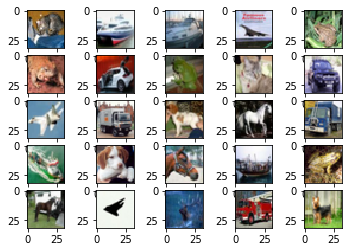

In [3]:
def images(abc):
    pyplot.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            pyplot.subplot2grid((5,5),(i,j))
            pyplot.imshow(toimage(abc[k]))
            k = k+1
    # show the plot
    pyplot.show()
    
images(x_test[:25])

<font color = 'green'> Looking at the dataset to see their range and classes of targets in y

In [4]:
#Looking at the number of target dataset.
np.unique(y_train)
np.unique(x_train)
np.unique(y_test)
np.unique(x_test)

array([0., 1.], dtype=float32)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

array([0., 1.], dtype=float32)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

<font color = 'green'> Converting x_train and x_test values strictly between 0 and 1 (normalizing RGB). This will help us remove distortions caused by lights and shadows in an image

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

<font color = 'red'>  There are 10 class labels and they can be identified as follows
 
- 0 : 'airplane', 1 : 'automobile', 2 : 'bird', 3 : 'cat', 4 : 'deer', 5 : 'dog', 6 :'frog', 7 :'horse', 8 :'ship', 9 :'truck'


### <font color = 'blue'> 2) Creating the Convolutional Model

<font color = 'green'>  Selecting random values for batch size and epochs. Selecting small epoch value due to computing limitations

In [6]:
batch_size = 138
epochs = 100
data_augmentation = True
num_predictions = 20

![title](Desktop/Capture1.png)

<font color = 'green'> Selecting Activation as 'relu' for all layers except for activation as 'softmax' for last dense layer and using some standard architechture with some default common values for dropout, optimizer hyperparameters and architecture

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
#printing the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [9]:
#Creating a checkpointer to save the best model and call it for scoring 
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)


### <font color = 'blue'> 3) Fitting our model and evaluating its accuracy on test dataset

In [10]:
#fitting our model
seqModel = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 118s - loss: 1.9668 - acc: 0.2867 - val_loss: 1.7216 - val_acc: 0.4024

Epoch 00001: val_loss improved from inf to 1.72157, saving model to model.weights.best.hdf5
Epoch 2/100
 - 117s - loss: 1.6612 - acc: 0.4000 - val_loss: 1.5618 - val_acc: 0.4460

Epoch 00002: val_loss improved from 1.72157 to 1.56183, saving model to model.weights.best.hdf5
Epoch 3/100
 - 117s - loss: 1.5277 - acc: 0.4481 - val_loss: 1.4487 - val_acc: 0.4869

Epoch 00003: val_loss improved from 1.56183 to 1.44873, saving model to model.weights.best.hdf5
Epoch 4/100
 - 117s - loss: 1.4402 - acc: 0.4822 - val_loss: 1.3651 - val_acc: 0.5192

Epoch 00004: val_loss improved from 1.44873 to 1.36513, saving model to model.weights.best.hdf5
Epoch 5/100
 - 116s - loss: 1.3761 - acc: 0.5081 - val_loss: 1.3386 - val_acc: 0.5244

Epoch 00005: val_loss improved from 1.36513 to 1.33858, saving model to model.weights.best.hdf5
Epoch 6/100
 - 116s - loss: 1.3239 - ac


Epoch 00049: val_loss did not improve from 0.68826
Epoch 50/100
 - 116s - loss: 0.5371 - acc: 0.8159 - val_loss: 0.7013 - val_acc: 0.7602

Epoch 00050: val_loss did not improve from 0.68826
Epoch 51/100
 - 116s - loss: 0.5261 - acc: 0.8176 - val_loss: 0.6907 - val_acc: 0.7638

Epoch 00051: val_loss did not improve from 0.68826
Epoch 52/100
 - 116s - loss: 0.5160 - acc: 0.8209 - val_loss: 0.6825 - val_acc: 0.7679

Epoch 00052: val_loss improved from 0.68826 to 0.68249, saving model to model.weights.best.hdf5
Epoch 53/100
 - 117s - loss: 0.5117 - acc: 0.8229 - val_loss: 0.6879 - val_acc: 0.7638

Epoch 00053: val_loss did not improve from 0.68249
Epoch 54/100
 - 116s - loss: 0.5029 - acc: 0.8269 - val_loss: 0.6816 - val_acc: 0.7685

Epoch 00054: val_loss improved from 0.68249 to 0.68162, saving model to model.weights.best.hdf5
Epoch 55/100
 - 116s - loss: 0.4939 - acc: 0.8286 - val_loss: 0.6788 - val_acc: 0.7685

Epoch 00055: val_loss improved from 0.68162 to 0.67881, saving model to mod

In [11]:
#Evaluating our model
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7825


<font color = 'green'> We achieved an accuracy of 78.25% on our test set

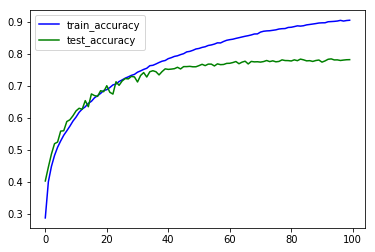

In [100]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
from keras.callbacks import History 
history = History()


train_loss = seqModel.history['loss']  
test_loss   = seqModel.history['val_loss']
train_acc  = seqModel.history['acc']
test_acc    = seqModel.history['val_acc']
x         = range(100)

plt.figure()
plt.plot(x, train_acc, '-b')
plt.plot(x, test_acc, '-g')
plt.gca().legend(('train_accuracy','test_accuracy'))

<font color = 'green'> We can notice that the test_accuract has plateaued after a certain point, so epoch of value 100 seems reasonable

### <font color = 'blue'> 4) Adding Data Augmentation and then training the model again.

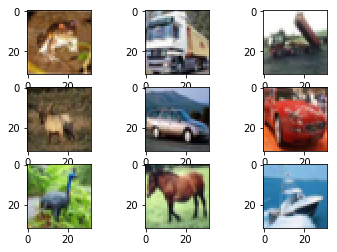

In [15]:
#Viewing some images from our dataset
for i in range(0, 9):
    pyplot.subplot(3,3, 1 + i)
    pyplot.imshow(x_train[i])
plt.show()

<font color = 'green'>Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches) and view some of the images

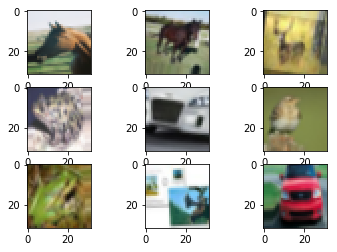

In [16]:
gen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    width_shift_range=0.075,
    height_shift_range=0.075,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range = 0.2
    )
gen.fit(x_train)

for x, y in gen.flow(x_train, y_train, batch_size=138):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x[i])
# show the plot
    pyplot.show()
    break

There are some changes in the images. However, these changes do not seem very helpful 

### <font color = 'blue'> 5) Fitting our model on augmented data

In [19]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.20))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.20))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10))
model2.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [20]:
checkpointer2 = ModelCheckpoint(filepath='model2.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

augmodel = model2.fit_generator(gen.flow(x_train, y_train, batch_size = 138),
                                 samples_per_epoch = x_train.shape[0], nb_epoch = 100, 
                                 validation_data = (x_train, y_train), callbacks=[checkpointer2], verbose=2,shuffle=True)

c:\users\malvika bodh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
c:\users\malvika bodh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=2, shuffle=True, steps_per_epoch=362, epochs=100)`
  


Epoch 1/100
 - 154s - loss: 1.9991 - acc: 0.2685 - val_loss: 1.7433 - val_acc: 0.3977

Epoch 00001: val_loss improved from inf to 1.74335, saving model to model2.weights.best.hdf5
Epoch 2/100
 - 156s - loss: 1.7121 - acc: 0.3827 - val_loss: 1.6257 - val_acc: 0.4235

Epoch 00002: val_loss improved from 1.74335 to 1.62571, saving model to model2.weights.best.hdf5
Epoch 3/100
 - 157s - loss: 1.6159 - acc: 0.4173 - val_loss: 1.5065 - val_acc: 0.4665

Epoch 00003: val_loss improved from 1.62571 to 1.50655, saving model to model2.weights.best.hdf5
Epoch 4/100
 - 157s - loss: 1.5488 - acc: 0.4403 - val_loss: 1.4613 - val_acc: 0.4846

Epoch 00004: val_loss improved from 1.50655 to 1.46134, saving model to model2.weights.best.hdf5
Epoch 5/100
 - 157s - loss: 1.4984 - acc: 0.4620 - val_loss: 1.4132 - val_acc: 0.4925

Epoch 00005: val_loss improved from 1.46134 to 1.41319, saving model to model2.weights.best.hdf5
Epoch 6/100
 - 158s - loss: 1.4582 - acc: 0.4772 - val_loss: 1.3340 - val_acc: 0.527

 - 162s - loss: 0.8491 - acc: 0.7044 - val_loss: 0.6601 - val_acc: 0.7717

Epoch 00051: val_loss improved from 0.69903 to 0.66005, saving model to model2.weights.best.hdf5
Epoch 52/100
 - 158s - loss: 0.8557 - acc: 0.7020 - val_loss: 0.6770 - val_acc: 0.7658

Epoch 00052: val_loss did not improve from 0.66005
Epoch 53/100
 - 151s - loss: 0.8384 - acc: 0.7044 - val_loss: 0.7093 - val_acc: 0.7552

Epoch 00053: val_loss did not improve from 0.66005
Epoch 54/100
 - 157s - loss: 0.8437 - acc: 0.7061 - val_loss: 0.6616 - val_acc: 0.7749

Epoch 00054: val_loss did not improve from 0.66005
Epoch 55/100
 - 146s - loss: 0.8317 - acc: 0.7086 - val_loss: 0.6823 - val_acc: 0.7614

Epoch 00055: val_loss did not improve from 0.66005
Epoch 56/100
 - 156s - loss: 0.8316 - acc: 0.7121 - val_loss: 0.7023 - val_acc: 0.7581

Epoch 00056: val_loss did not improve from 0.66005
Epoch 57/100
 - 155s - loss: 0.8294 - acc: 0.7109 - val_loss: 0.6843 - val_acc: 0.7642

Epoch 00057: val_loss did not improve from 0.

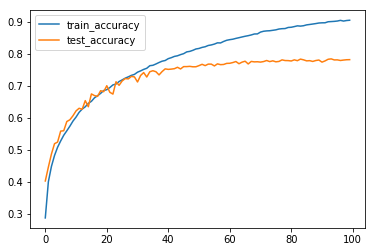

In [104]:
train2_loss = augmodel.history['loss']
test2_loss   = augmodel.history['val_loss']
train2_acc  = augmodel.history['acc']
test2_acc    = augmodel.history['val_acc']
x         = range(100)

plt.figure()

plt.plot(x, train_acc)
plt.plot(x, test_acc)
plt.gca().legend(('train_accuracy','test_accuracy'))

In [30]:
# evaluate and print test accuracy
model2.load_weights('model2.weights.best.hdf5')
score = model2.evaluate(x_test, y_test, verbose=2)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7776


<font color = 'green'> We can notice that our test accuracy has gone down after performing augmentation in our dataset. This shows us that the transformations that have been performed on the dataset do not enhance the image classification.

### <font color = 'blue'> 6) Performing Data Augmentation again with changed values for parameters

In [ ]:
#Performing Image Augmentation with changed values to see for any improvements

In [32]:
gen2 = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range = 0.2
    )
gen2.fit(x_train)

In [33]:
checkpointer3 = ModelCheckpoint(filepath='model3.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

augmodelnew = model2.fit_generator(gen2.flow(x_train, y_train, batch_size = 138),
                                 samples_per_epoch = x_train.shape[0], nb_epoch = 10, 
                                 validation_data = (x_train, y_train), callbacks=[checkpointer3], verbose=2,shuffle=True)

c:\users\malvika bodh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
c:\users\malvika bodh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=2, shuffle=True, steps_per_epoch=362, epochs=10)`
  


Epoch 1/10
 - 152s - loss: 0.7817 - acc: 0.7264 - val_loss: 0.5976 - val_acc: 0.7960

Epoch 00001: val_loss improved from inf to 0.59760, saving model to model3.weights.best.hdf5
Epoch 2/10
 - 163s - loss: 0.7824 - acc: 0.7282 - val_loss: 0.5959 - val_acc: 0.8008

Epoch 00002: val_loss improved from 0.59760 to 0.59587, saving model to model3.weights.best.hdf5
Epoch 3/10
 - 167s - loss: 0.7772 - acc: 0.7344 - val_loss: 0.5742 - val_acc: 0.8059

Epoch 00003: val_loss improved from 0.59587 to 0.57420, saving model to model3.weights.best.hdf5
Epoch 4/10
 - 161s - loss: 0.7692 - acc: 0.7318 - val_loss: 0.5926 - val_acc: 0.8021

Epoch 00004: val_loss did not improve from 0.57420
Epoch 5/10
 - 169s - loss: 0.7751 - acc: 0.7328 - val_loss: 0.5994 - val_acc: 0.7993

Epoch 00005: val_loss did not improve from 0.57420
Epoch 6/10
 - 170s - loss: 0.7644 - acc: 0.7332 - val_loss: 0.5702 - val_acc: 0.8115

Epoch 00006: val_loss improved from 0.57420 to 0.57024, saving model to model3.weights.best.hdf

In [34]:
model2.load_weights('model3.weights.best.hdf5')
score = model2.evaluate(x_test, y_test, verbose=2)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7756


<font color = 'green'> With only 10 epochs we have achieved an accuracy of 0.7756. 

### <font color = 'blue'> 7) Adding Data Augmentation and then training the model again.
-     Tuning Batch Size and Number of Epochs

In [82]:
#Creating a function with the layers
def cnetwork(optimizer='rmsprop'):
    
    # Start sequential model
    network = Sequential()
    network.add(Conv2D(32, (3, 3),padding ='same', activation='relu', input_shape=x_train.shape[1:]))
    network.add(Conv2D(32, (3, 3), activation='relu'))
    network.add(MaxPooling2D(pool_size=(2, 2)))
    network.add(Dropout(0.2))
    network.add(Conv2D(32, (3, 3),padding ='same', activation='relu'))
    network.add(MaxPooling2D(pool_size=(2, 2)))
    network.add(Dropout(0.2))
    network.add(Flatten())
    network.add(Dense(units=512, activation='relu'))
    network.add(Dropout(0.4))
    network.add(Dense(units=10, activation='softmax'))

    # Compile model
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer=optimizer, # Optimizer
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled model
    return network

In [83]:
#Selecting only 5 and 10 epochs to limit the code run time. 

epochs = [5, 10] # 2 values for epochs
batches = [32, 64, 128] #3 values for batch size
optimizers = ['rmsprop', 'adam'] #Rmsprop and Adam optimizer for optmizer choice

# Creating a dictionary with all the hyper parameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

In [84]:
hyperparameters
network = KerasClassifier(build_fn=cnetwork, verbose=0)

In [85]:
# Creating grid search
grid = GridSearchCV(estimator=network, param_grid=hyperparameters)
# Fitting grid search
grid_result = grid.fit(x_train, y_train)

c:\users\malvika bodh\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [86]:
# View hyperparameters of best neural network
grid_result.best_params_

{'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}

<font color = 'green'> With the selection from given hyperparameters, batch size of 32, 10 epochs and adam optimizer were selected

### <font color = 'blue'> 7) Adding Data Augmentation and then training the model again.
-     Tuning Learning rate ( Input variables from above into the model)

In [87]:
def newnetwork(learn_rate=0.0001):
    
    # Start sequential model
    newnetwork = Sequential()
    newnetwork.add(Conv2D(32, (3, 3),padding ='same', activation='relu', input_shape=x_train.shape[1:]))
    newnetwork.add(Conv2D(32, (3, 3), activation='relu'))
    newnetwork.add(MaxPooling2D(pool_size=(2, 2)))
    newnetwork.add(Dropout(0.2))
    newnetwork.add(Conv2D(32, (3, 3),padding ='same', activation='relu'))
    newnetwork.add(MaxPooling2D(pool_size=(2, 2)))
    newnetwork.add(Dropout(0.2))
    newnetwork.add(Flatten())
    newnetwork.add(Dense(units=512, activation='relu'))
    newnetwork.add(Dropout(0.4))
    newnetwork.add(Dense(units=10, activation='softmax'))

    # Compile model
    optimizer = keras.optimizers.rmsprop(lr=learn_rate, decay=1e-6)
    newnetwork.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    #return the compiled model
    return newnetwork

In [88]:
newmodel = KerasClassifier(build_fn=newnetwork, epochs=10, batch_size=64, verbose=2)
param_grid = {'learn_rate':[0.0001, 0.01, 0.1, 0.2]}

grid = GridSearchCV(estimator=newmodel, param_grid=param_grid )
grid_result = grid.fit(x_train, y_train)
grid_result.best_params_

c:\users\malvika bodh\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
 - 72s - loss: 0.2892 - acc: 0.9009
Epoch 2/10
 - 70s - loss: 0.2517 - acc: 0.9054
Epoch 3/10
 - 70s - loss: 0.2359 - acc: 0.9095
Epoch 4/10
 - 70s - loss: 0.2260 - acc: 0.9126
Epoch 5/10
 - 70s - loss: 0.2175 - acc: 0.9154
Epoch 6/10
 - 70s - loss: 0.2114 - acc: 0.9179
Epoch 7/10
 - 70s - loss: 0.2053 - acc: 0.9197
Epoch 8/10
 - 70s - loss: 0.2001 - acc: 0.9219
Epoch 9/10
 - 70s - loss: 0.1957 - acc: 0.9234
Epoch 10/10
 - 70s - loss: 0.1911 - acc: 0.9254
Epoch 1/10
 - 73s - loss: 0.2850 - acc: 0.9009
Epoch 2/10
 - 70s - loss: 0.2509 - acc: 0.9054
Epoch 3/10
 - 70s - loss: 0.2373 - acc: 0.9086
Epoch 4/10
 - 70s - loss: 0.2269 - acc: 0.9122
Epoch 5/10
 - 71s - loss: 0.2184 - acc: 0.9151
Epoch 6/10
 - 70s - loss: 0.2119 - acc: 0.9173
Epoch 7/10
 - 72s - loss: 0.2063 - acc: 0.9194
Epoch 8/10
 - 70s - loss: 0.2005 - acc: 0.9218
Epoch 9/10
 - 70s - loss: 0.1958 - acc: 0.9235
Epoch 10/10
 - 71s - loss: 0.1910 - acc: 0.9255
Epoch 1/10
 - 73s - loss: 0.2866 - acc: 0.9011
Epoch 2/10


{'learn_rate': 0.0001}

<font color = 'green'> Learning rate of 0.0001 was selected by using gridsearch 

### <font color = 'blue'> 8) Running our model with tuned hyper-parameters
    
-    Epoch size between 5 and 10: 10 was selected

In [89]:
#creating our model using tuned hyperparameters
updatedmodel = Sequential()
updatedmodel.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
updatedmodel.add(Activation('relu'))
updatedmodel.add(Conv2D(32, (3, 3)))
updatedmodel.add(Activation('relu'))
updatedmodel.add(MaxPooling2D(pool_size=(2, 2)))
updatedmodel.add(Dropout(0.20))

updatedmodel.add(Conv2D(64, (3, 3), padding='same'))
updatedmodel.add(Activation('relu'))
updatedmodel.add(MaxPooling2D(pool_size=(2, 2)))
updatedmodel.add(Dropout(0.20))

updatedmodel.add(Flatten())
updatedmodel.add(Dense(512))
updatedmodel.add(Activation('relu'))
updatedmodel.add(Dropout(0.4))
updatedmodel.add(Dense(10))
updatedmodel.add(Activation('softmax'))
optimizer= keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
updatedmodel.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


updatedmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_168 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_22 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_165 (Dropout)        (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 15, 15, 64)        18496     
__________

In [92]:
checkpointerfinal = ModelCheckpoint(filepath='modelfinal.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
FinalModel = updatedmodel.fit(x_train, y_train,
              batch_size=32,
              epochs=10,
              validation_data=(x_test, y_test), callbacks=[checkpointerfinal], 
          verbose=2, shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 160s - loss: 1.7199 - acc: 0.3734 - val_loss: 1.4565 - val_acc: 0.4771

Epoch 00001: val_loss improved from inf to 1.45650, saving model to modelfinal.weights.best.hdf5
Epoch 2/10
 - 157s - loss: 1.4217 - acc: 0.4879 - val_loss: 1.3251 - val_acc: 0.5407

Epoch 00002: val_loss improved from 1.45650 to 1.32510, saving model to modelfinal.weights.best.hdf5
Epoch 3/10
 - 157s - loss: 1.2939 - acc: 0.5405 - val_loss: 1.1877 - val_acc: 0.5865

Epoch 00003: val_loss improved from 1.32510 to 1.18767, saving model to modelfinal.weights.best.hdf5
Epoch 4/10
 - 160s - loss: 1.1977 - acc: 0.5771 - val_loss: 1.1279 - val_acc: 0.6070

Epoch 00004: val_loss improved from 1.18767 to 1.12792, saving model to modelfinal.weights.best.hdf5
Epoch 5/10
 - 162s - loss: 1.1248 - acc: 0.6044 - val_loss: 1.0485 - val_acc: 0.6355

Epoch 00005: val_loss improved from 1.12792 to 1.04848, saving model to modelfinal.weights.best.hdf5
Epoch 6/10
 - 162s 

In [93]:
updatedmodel.load_weights('modelfinal.weights.best.hdf5')
score = updatedmodel.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7083


<font color = 'green'> The test accuracy is quite low as compared to our initial model. However, the reason for that could be the low number of epochs in our current model.

### <font color = 'blue'><b> Running the model again with epoch size of 100

In [109]:
networkmodel1 = Sequential()
networkmodel1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
networkmodel1.add(Activation('relu'))
networkmodel1.add(Conv2D(32, (3, 3)))
networkmodel1.add(Activation('relu'))
networkmodel1.add(MaxPooling2D(pool_size=(2, 2)))
networkmodel1.add(Dropout(0.20))

networkmodel1.add(Conv2D(64, (3, 3), padding='same'))
networkmodel1.add(Activation('relu'))
networkmodel1.add(MaxPooling2D(pool_size=(2, 2)))
networkmodel1.add(Dropout(0.20))

networkmodel1.add(Flatten())
networkmodel1.add(Dense(512))
networkmodel1.add(Activation('relu'))
networkmodel1.add(Dropout(0.4))
networkmodel1.add(Dense(10))
networkmodel1.add(Activation('softmax'))
optimizer= keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
networkmodel1.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


networkmodel1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_174 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_116 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_171 (Dropout)        (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 15, 15, 64)        18496     
__________

In [110]:
checkpointerfinal1 = ModelCheckpoint(filepath='modelfinal1.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
netmodel = networkmodel1.fit(x_train, y_train,
              batch_size=32,
              epochs=100,
              validation_data=(x_test, y_test), callbacks=[checkpointerfinal1], 
          verbose=2, shuffle=True)
networkmodel1.load_weights('modelfinal1.weights.best.hdf5')
score2 = networkmodel1.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score2[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 172s - loss: 1.7204 - acc: 0.3743 - val_loss: 1.4684 - val_acc: 0.4808

Epoch 00001: val_loss improved from inf to 1.46838, saving model to modelfinal1.weights.best.hdf5
Epoch 2/100
 - 174s - loss: 1.4198 - acc: 0.4897 - val_loss: 1.3280 - val_acc: 0.5357

Epoch 00002: val_loss improved from 1.46838 to 1.32802, saving model to modelfinal1.weights.best.hdf5
Epoch 3/100
 - 172s - loss: 1.2827 - acc: 0.5440 - val_loss: 1.1884 - val_acc: 0.5854

Epoch 00003: val_loss improved from 1.32802 to 1.18840, saving model to modelfinal1.weights.best.hdf5
Epoch 4/100
 - 173s - loss: 1.1841 - acc: 0.5798 - val_loss: 1.1095 - val_acc: 0.6124

Epoch 00004: val_loss improved from 1.18840 to 1.10954, saving model to modelfinal1.weights.best.hdf5
Epoch 5/100
 - 174s - loss: 1.1074 - acc: 0.6091 - val_loss: 1.0278 - val_acc: 0.6445

Epoch 00005: val_loss improved from 1.10954 to 1.02778, saving model to modelfinal1.weights.best.hdf5
Epoch 6/1


Epoch 00050: val_loss did not improve from 0.67988
Epoch 51/100
 - 157s - loss: 0.2065 - acc: 0.9268 - val_loss: 0.7561 - val_acc: 0.7801

Epoch 00051: val_loss did not improve from 0.67988
Epoch 52/100
 - 157s - loss: 0.1987 - acc: 0.9297 - val_loss: 0.7650 - val_acc: 0.7824

Epoch 00052: val_loss did not improve from 0.67988
Epoch 53/100
 - 157s - loss: 0.1955 - acc: 0.9316 - val_loss: 0.7828 - val_acc: 0.7790

Epoch 00053: val_loss did not improve from 0.67988
Epoch 54/100
 - 157s - loss: 0.1889 - acc: 0.9335 - val_loss: 0.7936 - val_acc: 0.7795

Epoch 00054: val_loss did not improve from 0.67988
Epoch 55/100
 - 158s - loss: 0.1846 - acc: 0.9349 - val_loss: 0.7838 - val_acc: 0.7809

Epoch 00055: val_loss did not improve from 0.67988
Epoch 56/100
 - 157s - loss: 0.1792 - acc: 0.9370 - val_loss: 0.7945 - val_acc: 0.7789

Epoch 00056: val_loss did not improve from 0.67988
Epoch 57/100
 - 157s - loss: 0.1741 - acc: 0.9380 - val_loss: 0.8063 - val_acc: 0.7784

Epoch 00057: val_loss did 

<font color = 'green'> While these hyperparamaetrs were tuned separately, the model does not perform well as compared to our intial model. These parameters selected separately do not perform well in our case.